# Intro to Python and First law of Thermodynamics

In this tutorial we are going to go over some basic operations in Python that will guide you through the course and as an example we will use some of the thermodynamic concepts learned in class. <br>

This tutorial can be deployed in 
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/ChemAI-Lab/Math4Chem/blob/main/website/Lecture_Notes/Notes/Coding/intro_thermo.ipynb
)

In [2]:
# import numpy and matplotlib and pyplot
# code here!
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Thermodynamics recap

## First Law of Thermodynamics

The change in the internal energy (U) of a system is the sum of the heat (q) transferred to the system and the work (w) done on the system,
$$
dU = q + w
$$

## Heat
The energy that flows in between two objects that are at different temperatures. At constant pressure processes we can define heat as,
$$
dq_{p} = C_{P}dT,
$$
where $C_{P}$ is is the heat capacity of a substance at constant pressure, $C_{P} = mc_{p}$ where $m$ is the mass.

## P-V Work
Work in thermodynamics is defined as in classical mechanics, the energy transferred to a system by applying an external force along a displacement. 
In thermodynamics, one of the most common ways to do wok on a system is by changing the volume of the system through compression of expansion (P-V work).
P-V work is defined as,
$$
w = -\int_{V_{i}}^{V_{f}} P(T,V) dV
$$
where $P(T,V)$ is a function that describes the pressure of the system as a function of temperature (T) and its volume (V).
This type of integrals are known as **line integrals**. 



## Line integral
Let's compute the work done by a processes where the Pressure is given by,
$$
P(V) = \sin(V) + a V + b,
$$
where $a = -0.55$ and $b = 10.55$.

The initial and final volume for this processes are, $V_i = 10$ and $V_f=5$.


In [3]:
# define the P function
def f_P(v):
    # code here
    a = -0.55
    b = 10.55
    p = np.sin(v) + a*v + b
    return p

In [4]:
vi = 10
vf = 5
pi = f_P(vi)
pf = f_P(vf)

print(vi,pi)
print(vf,pf)

10 4.505978889110631
5 6.841075725336863


/var/folders/x7/dwvwf5c92p71ds8swvmz8rlh0000gn/T/ipykernel_60651/4281051266.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


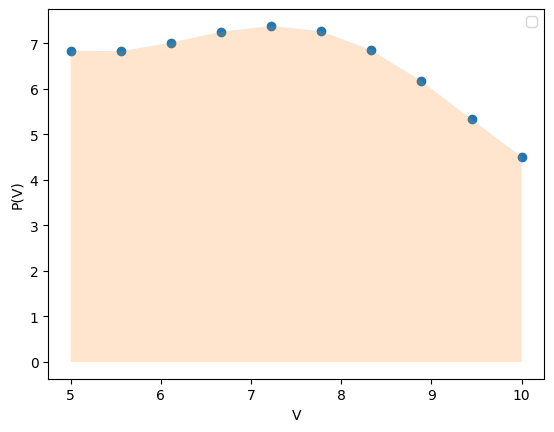

In [5]:
# plot this process V vs P where the area under the curve is also coloured
# tip: plt.fill_between()
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.fill_between.html#matplotlib.axes.Axes.fill_between

v_grid = np.linspace(vi,vf,10)
p_grid = f_P(v_grid)

plt.scatter(v_grid,p_grid)
# plt.plot(v_grid,p_grid,color='black',label="P(V)")
plt.fill_between(v_grid,p_grid,alpha=0.2)
plt.xlabel("V")
plt.ylabel("P(V)")
plt.legend()

What are the initial and final pressure? 

In [6]:
# code here
pi = f_P(vi)
pf = f_P(vf)

print('Initial pressure = ', f'{pi:.3f}')
print('Final pressure = ', f'{pf:.3f}')

Initial pressure =  4.506
Final pressure =  6.841


## Trapezoidal Rule

The [trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule) is one of the most common numerical integration strategies,
$$
\int_a^b f(x) dx \approx  \sum_{i=1}^N \frac{f(x_{i-1}) + f(x_{i})}{2} \Delta x  = \sum_{i=1}^N \frac{f(x_{i-1})}{2}\Delta x + \sum_{i=1}^N \frac{f(x_{i})}{2} \Delta x
$$
where the partition of $[a,b]$ is $x_0 < x_1 < \cdots < x_N$ where $a = x_0$ and $b = x_N$. <br>
$\Delta x$ is the difference between two consecutive points, $\Delta x = x_{i+1} - x_i$.

If we expand the sum, we get,
$$
% \int_a^b f(x) dx \approx \sum_{i=1}^N \frac{f(x_{i-1})}{2}\Delta x + \sum_{i=1}^N \frac{f(x_{i})}{2} \Delta x
\int_a^b f(x) dx \approx \frac{\Delta x}{2}\left ( f(x_0) + 2f(x_1) + 2f(x_2) + 2f(x_3) + \cdots + f(x_N) \right )
$$


Let's consider 5 grid points $x_0 < x_1 < x_2 < x_3 < x_4$. <br>
How many terms does each term have? 

$$
\sum_{i=1}^N \frac{f(x_{i-1})}{2}\Delta x = \frac{\Delta x}{2} \left( f(x_0) + f(x_1) + f(x_2) + f(x_3)  \right)
$$
$$
\sum_{i=1}^N \frac{f(x_{i})}{2}\Delta x = \frac{\Delta x}{2} \left( f(x_1) + f(x_2) + f(x_3) + f(x_4) \right)
$$
if we sum both terms we get, 
$$
\int_a^b f(x) dx \approx  \frac{\Delta x}{2} \left(  f(x_0) + 2f(x_1) + 2f(x_2) + 2f(x_3) + f(x_4)  \right)
$$

From the above equation, we can observe that except from the first ($x_0$) and last ($x_N$) term of the grid points, all other points are multiplied by a factor of 2.<br>

There are are many ways to code the above trapezoidal rule, 
1. **For loops** --> this tutorial.
2. **Element-wise vector multiplication** --> suggested homework.

### Slicing in Python
Slice syntax allows us to select a range of items in a list or Numpy array.<br>


In [7]:
n_points = 5
x = np.linspace(0, 10, n_points)
print(x)

# print first element 
print(x[0])

# print second element
print(x[1])

# print last element
print(x[-1])

# print second last element
print(x[-2])

# print elements up to the third one
print(x[0:3])

print(x[::3])

# iterate x reverse order
print(x[::-1])

print(x[1:4])

[ 0.   2.5  5.   7.5 10. ]
0.0
2.5
10.0
7.5
[0.  2.5 5. ]
[0.  7.5]
[10.   7.5  5.   2.5  0. ]
[2.5 5.  7.5]


 
Let's consider 5 grid points $x_0 < x_1 < x_2 < x_3 < x_4$. <br>
How many terms does each term have? 

$$
\sum_{i=1}^N \frac{f(x_{i-1})}{2}\Delta x = \frac{\Delta x}{2} \left( f(x_0) + f(x_1) + f(x_2) + f(x_3)  \right)
$$
$$
\sum_{i=1}^N \frac{f(x_{i})}{2}\Delta x = \frac{\Delta x}{2} \left( f(x_1) + f(x_2) + f(x_3) + f(x_4) \right)
$$
if we sum both terms we get, 
$$
\int_a^b f(x) dx \approx  \frac{\Delta x}{2} \left(  f(x_0) + 2f(x_1) + 2f(x_2) + 2f(x_3) + f(x_4)  \right)
$$


In [8]:
# code for trapezoidal rule
def trap_rule(y, dx):
    int_value = dx*(y[0] + y[-1])/2 # first and last value of the integrand
    for yi in y[1:-1]: # iterate over the remaining elements
        int_value += dx*yi
    return int_value

In [9]:
# code here
vi = 10 # variable for initial volume
vf = 1 # variable for final volume
n = 50 # number of points for the integration grid

v = np.linspace(vi,vf,n) # array of volumes for the integration grid
dv =  v[0] - v[1] # width of the rectangles for integration
p = f_P(v) # array of pressures for the integration grid

w = trap_rule(p, dv) # call the trapezoidal rule function

# ---------------------------------------------------
print('N =  ', n)
print('DV = ', dv)
print('work = ', w)

N =   50
DV =  0.18367346938775597
work =  69.1004937796666


Compute the true value of $P(T,V)$ for this process.
$$
w = -\int_{V_{i}}^{V_{f}} P(T,V) dV = -\int_{V_{i}}^{V_{f}} \left ( \sin(V) + a V + b \right ) dV 
$$
where $a = -0.55$ and $b = 10.55$.

<!-- w = -69.1044 -->

Using your code, how many grid points are required for numerical integration to approximate the true value  95%.  <br>
The formula for mean percentage error (MPE) for a single point is, 
$$
MPE =  \left| \frac{y - \hat{y}}{\hat{y}} \right|100\%,
$$
where $\hat{y}$ is the true or exact value and $y$ is the predicted one.


In [10]:
# # create a function for the MPE
def MPE(y, y_hat):
    #code here
    error = (y - y_hat)/y_hat
    abs_error = np.abs(error)
    value = 100*abs_error
    return value

itr: 5, -68.46657
itr: 15, -69.05654
itr: 25, -69.08817
itr: 35, -69.09631
itr: 45, -69.09956
itr: 55, -69.10118
itr: 65, -69.10210
itr: 75, -69.10267
itr: 85, -69.10305
itr: 95, -69.10332


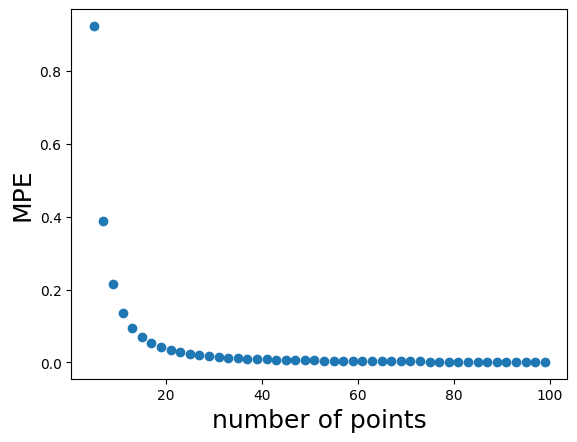

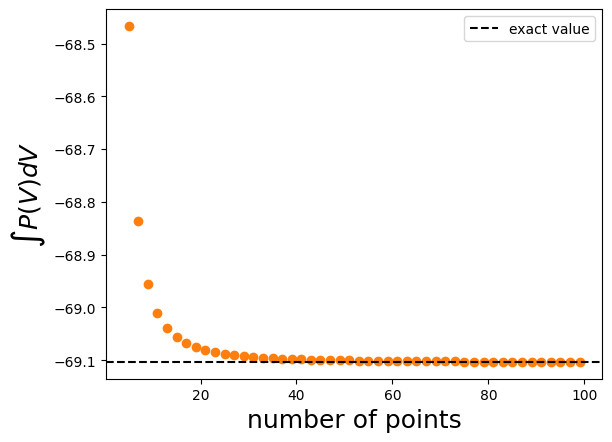

In [11]:

vi = 10  # variable for initial volume
vf = 1  # variable for final volume
w_exact = -69.1044 # exact value of the work for this process

mpe_ = [] # list to store the MPE
w_ = []  # list to store the work values

n_ = np.arange(5, 100, 2)  # grid on total number of integration points
for n in n_: # iterate over the number of points
    
    v = np.linspace(vi,vf, n) # creates a grid of n points between vi and vf
    dv = v[1] - v[0] # width of the rectangles for integration
    p = f_P(v) # value of pressure at each volume
    w = trap_rule(p,dv) # call the trapezoidal rule function
    mpei = MPE(w,w_exact) # calculate the MPE
    
    w_.append(w)
    mpe_.append(mpei)
    if (n % 5) == 0:
        print(f'itr: {n},', f'{w:.5f}')

w_ = np.array(w_) # list to array
mpe_ = np.array(mpe_) # list to array

# # plot
plt.figure(0)
plt.scatter(n_,mpe_)
plt.xlabel('number of points',fontsize=18)
plt.ylabel('MPE', fontsize=18)


# plot
plt.figure(1)
plt.scatter(n_, w_,color='tab:orange')
plt.axhline(y=w_exact, color='k', linestyle='--', label='exact value')
plt.xlabel('number of points', fontsize=18)
plt.ylabel(r'$\int P(V) dV$', fontsize=18)
plt.legend()
    

Let's do the same analysis but now using, 
$$
P(V) = \sin \left (\frac{V}{0.1} \right ) + a V + b,
$$
where $a = -0.55$ and $b = 10.55$.

The integral of this function is, 
$$
\int_{1}^{10} P(V) dV = 67.5549
$$

Text(0, 0.5, 'P(V)')

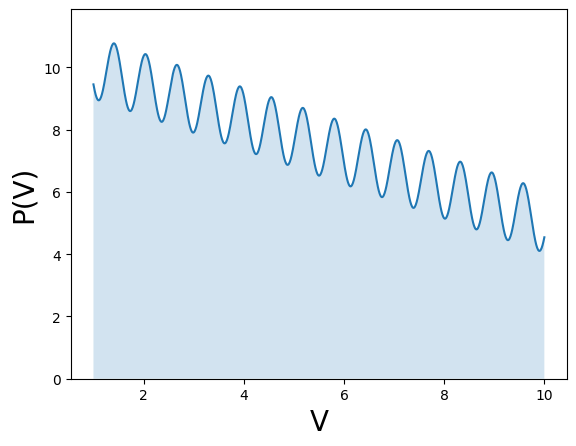

In [ ]:
def f_P_new(V):
    # code here
    
    return p

vi = 1.
vf = 10

n = 1000
v = np.linspace(vi, vf, n)
p = f_P_new(v)

# plotting
plt.plot(v, p)
plt.fill_between(v, p, alpha=0.2)
plt.ylim(0, np.max(p)+1.1)
plt.xlabel('V', fontsize=20)
plt.ylabel('P(V)', fontsize=20)

itr: 10, 67.60790
itr: 12, 67.60790
itr: 14, 67.60790
itr: 16, 67.60790
itr: 18, 67.60790
itr: 20, 67.60790
itr: 22, 67.60790
itr: 24, 67.60790
itr: 26, 67.60790
itr: 28, 67.60790
itr: 30, 67.60790
itr: 32, 67.60790
itr: 34, 67.60790
itr: 36, 67.60790
itr: 38, 67.60790
itr: 40, 67.60790
itr: 42, 67.60790
itr: 44, 67.60790
itr: 46, 67.60790
itr: 48, 67.60790


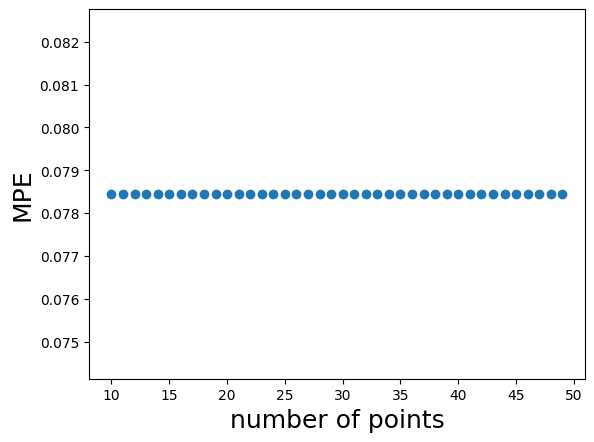

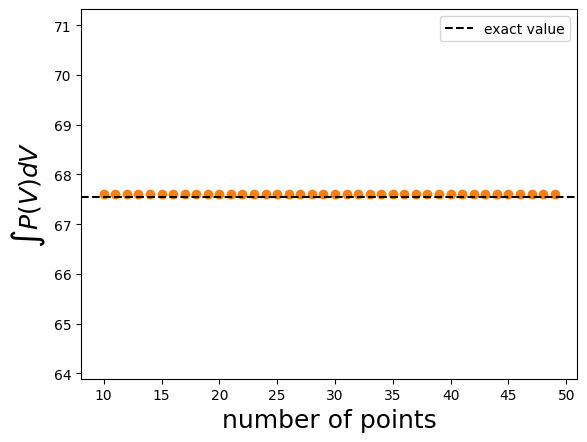

In [ ]:
# play around with the number of grid points

vi = 1. # initial volume
vf = 10 # final volume
w_exact = 67.5549 # exact value of the work for this process

mpe_ = []  # list to store the values
w_ = [] # list to store the values

n_ = np.arange(10, 50, 1) # grid on total number of integration points
for n in n_: # iterate over the number of points
    
    # compute the work and MPE for different n grid points
    # use "w" for the work value and "mpei" for the MPE value
    # code here!
    
    w_.append(w)
    mpe_.append(mpei)
    if (n % 2) == 0:
        print(f'itr: {n},', f'{w:.5f}')

w_ = np.array(w_)
mpe_ = np.array(mpe_)

# plot
plt.figure(0)
plt.scatter(n_, mpe_)
plt.xlabel('number of points', fontsize=18)
plt.ylabel('MPE', fontsize=18)


# plot
plt.figure(1)
plt.scatter(n_, w_, color='tab:orange')
plt.axhline(y=w_exact, color='k', linestyle='--', label='exact value')
plt.xlabel('number of points', fontsize=18)
plt.ylabel(r'$\int P(V) dV$', fontsize=18)
plt.legend()

# Heat Capacity
the heat capacity $C_{P}$ of a substance is the amount of heat absorbed by the system to increase its temperature 1C. <br>

Experimentally one can measure the $C_{P}$ of a substance using a calorimeter for example, where we can measure the temperature and the amount of heat transferred to the substance. <br>
We can approximate the computation of $C_{P}$ as, 
$$
C_{P} = \frac{q}{\Delta T}
$$


The following experimental data contains the measured amount of heat (q) to change 1 kg of an unknown material from the initial temperature ($T_i$) to a final one ($T_f$). <br>

| heat (kJ)   | $T_i$ (C) | $T_f$ (C) |
| -------- | ------- | ------- |
| 9.08 | 21.5 | 31.38 |
| 10.52 | 40.4 | 51.93 |
| 10.27 | 60.36 | 71.44 |
| 7.6 | 81.75 | 90.1 |
| 8.1 | 101.97 | 110.84 |
| 8.38 | 121.32 | 130.31 |
| 9.0 | 141.07 | 150.75 |

**Exercise** <br>
1. Compute the mean and the standard deviation of the $C_{P}$ using this experimental data.
2. Tip: use the slicing "tricks" we learned in this tutorial.

Tips:
1. [`np.mean`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)
2. [`np.std`](https://numpy.org/doc/stable/reference/generated/numpy.std.html)

In [14]:
# code here!